### 목표
- 유방암 데이터 셋을 활용하여 유방암 예측 모델(이진분류)

In [56]:
%cd /content/drive/MyDrive/Colab Notebooks/esgc

/content/drive/MyDrive/Colab Notebooks/esgc


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer # 유방암 데이터셋

In [58]:
# 데이터 로드
breast_data = load_breast_cancer()

In [59]:
breast_data # 번치객체(딕셔너리처럼 활용)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [60]:
breast_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [61]:
# X, y 데이터 분리
X = breast_data["data"]
y = breast_data["target"]

In [62]:
pd.Series(y).value_counts()

# 1 : 양성
# 0 : 음성

,count
1,357
0,212


In [63]:
# train, test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size= 0.3,
                                    random_state= 2025,
                                    stratify= y) # 분류시에만 적용, y를 기준으로 동일한 비율로 train과 test를 나눠줌

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

### 모델링

In [65]:
# 도구 불러오기
from tensorflow.keras.models import Sequential          # 뼈대
from tensorflow.keras.layers import InputLayer, Dense   # 딥러닝 층

In [66]:
# 1. 신경망 구조 설계

# 뼈대
model = Sequential()

# 입력층 - 입력 모양을 정하는 역할
model.add(InputLayer(shape=(30, ))) # 데이터 1개의 모양을 지정

# 중간층
model.add(Dense(units= 32, activation= "relu")) # 중간층에서는 relu가 지금은 사용되지 않음
model.add(Dense(units= 64, activation= "relu")) # 중간층에서의 Activation은 "역치"
model.add(Dense(units= 128, activation= "relu"))
model.add(Dense(units= 256, activation= "relu"))
model.add(Dense(units= 128, activation= "relu"))
model.add(Dense(units= 64, activation= "relu"))
model.add(Dense(units= 32, activation= "relu"))
# 초기 퍼셉트론 -> Step function -> 오차의 정도(얼마나 틀렸는지)를 전달하지 못하더라...
# sigmoid로 교체 -> 오차의 정도는 잘 전달함, 양쪽 끝단에 기울기가 완만(숫자값 -) "기울기 소실 문제" 발생
# sigmoid 계열에서 Relu계열로 넘어오게 됨(가장 많이 사용())

# 출력층 - 출력 모양을 정하는 역할
model.add(Dense(units= 1, activation = "sigmoid"))

In [67]:
# 2. 학습방법 설정
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# 출력 모양에 따라 학습 방법 설정은 크게 3가지!
# 회귀 : loss = mean_squared_error, metrics = mse
# 이진분류 : loss = binary_crossentropy, metrics = accuracy
# 다중분류 : loss = sparse_categorical_crossentropy, metrics = accuracy

# 경사하강법(Optimizer) 종류
# GD : 경사 하강법(전체 데이터 활용) -> 연산량
# SGD : 확률적 경사 하강법(일부 데이터만 활용, 기본 배치사이즈 32)
# Momentum : 관성, 이전 배치를 고려해서 학습
# NAG : 관성, 이후 배치를 고려해서 학습
# AdaGrad : 방향을 찾는데 특화되어 있음
# Adam : AdaGrad + Momentum(현재 가장 많이 활용되고 있는 최적화 함수, 성능이 매우 좋은 편!)

In [68]:
# 3. 학습
h = model.fit(X_train, y_train, validation_split= 0.3, epochs = 100)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.4643 - loss: 5.0805 - val_accuracy: 0.5750 - val_loss: 1.1392
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7374 - loss: 0.6426 - val_accuracy: 0.8500 - val_loss: 0.4169
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8499 - loss: 0.3773 - val_accuracy: 0.8000 - val_loss: 0.8383
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8851 - loss: 0.3804 - val_accuracy: 0.8917 - val_loss: 0.4065
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8420 - loss: 0.4463 - val_accuracy: 0.8083 - val_loss: 0.4180
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8747 - loss: 0.2943 - val_accuracy: 0.8833 - val_loss: 0.3887
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9222 - loss: 0.2763 - val_accuracy: 0.8333 - val_loss: 0.6747
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9081 - loss: 0.2650 - val_accuracy: 0.8333 - val_loss:

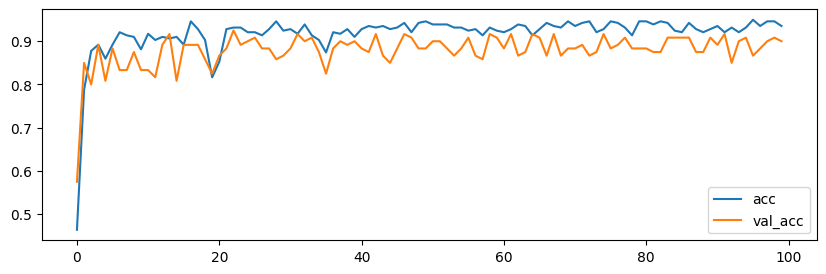

In [69]:
# 학습 결과 시각화
plt.figure(figsize = (10, 3))

plt.plot(h.history["accuracy"], label = "acc")
plt.plot(h.history["val_accuracy"], label = "val_acc")

plt.legend()

plt.show()